In [4]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np



import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plot we will create


# Read in the data

df = pd.read_csv(r'C:\Users\PC\Downloads\movies.csv')

In [5]:
# Let look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
# Let's see if there any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
df.isnull()

In [11]:
# Data types for our colums

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Creating a correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,Octo
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,Febr
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,Apri
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,Octo


In [25]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [19]:
pd.set_option('display.max_rows', None)

In [23]:
# Drop an duplicate

df['company'].drop_duplicates().sort_values(ascending=False)

# or use
# "df.drop_duplicate()" for all duplicates

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [ ]:
# Budget high correlation
#  Company high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

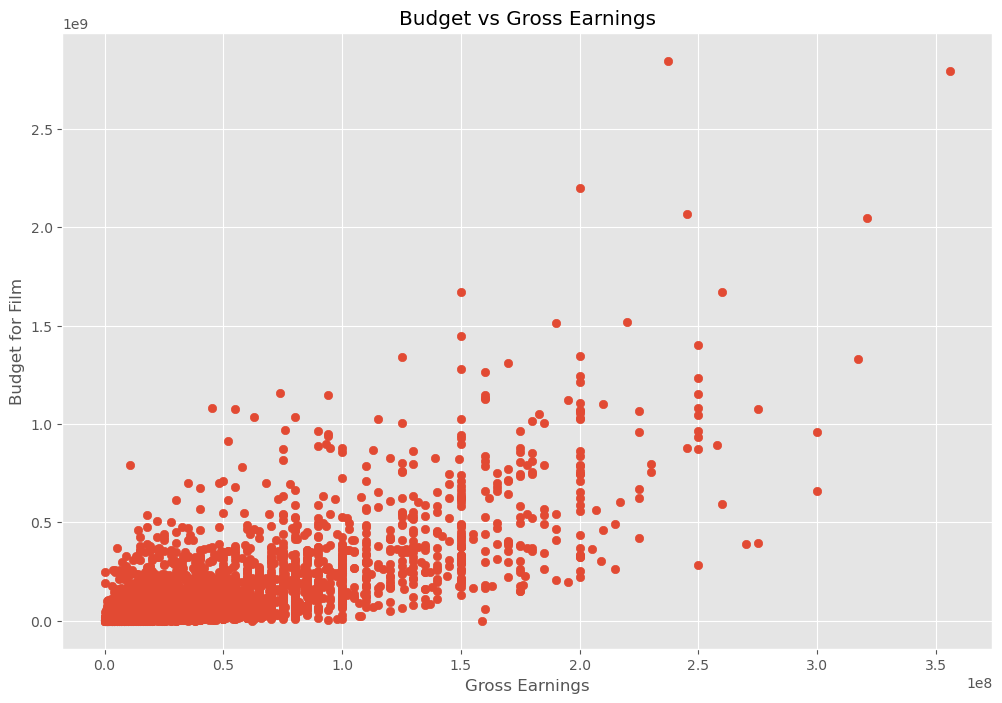

In [27]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show

In [26]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri


<AxesSubplot:xlabel='budget', ylabel='gross'>

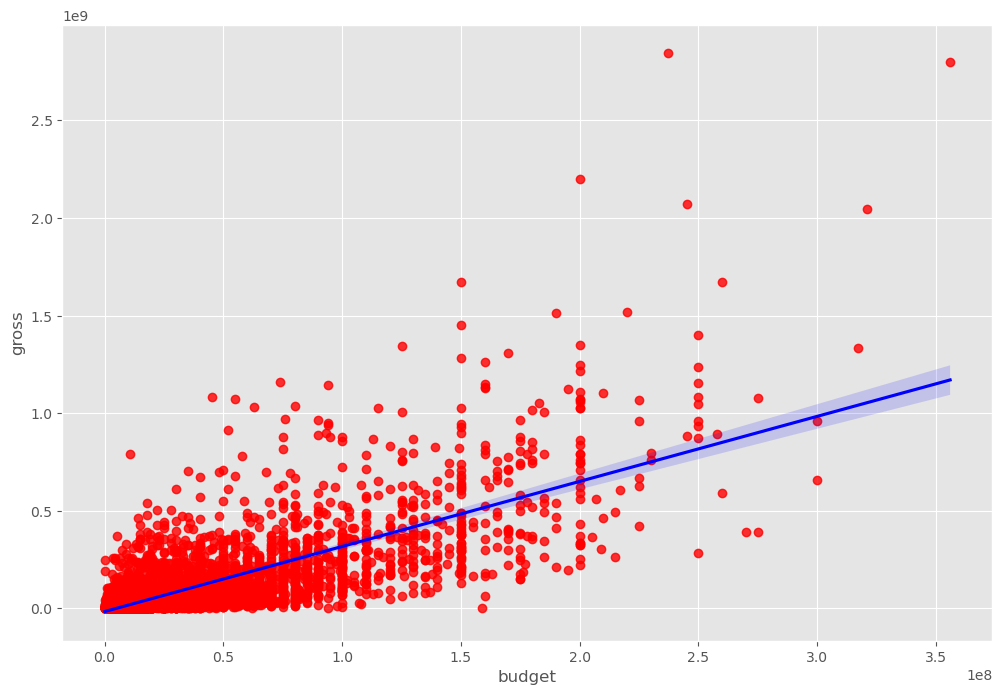

In [34]:
# plot the Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [ ]:
# Let's start looking at correlation

In [43]:
df.corr(method='pearson') #pearson, kendall, spearman 

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [ ]:
# High correlation between budget and gross
# I was right

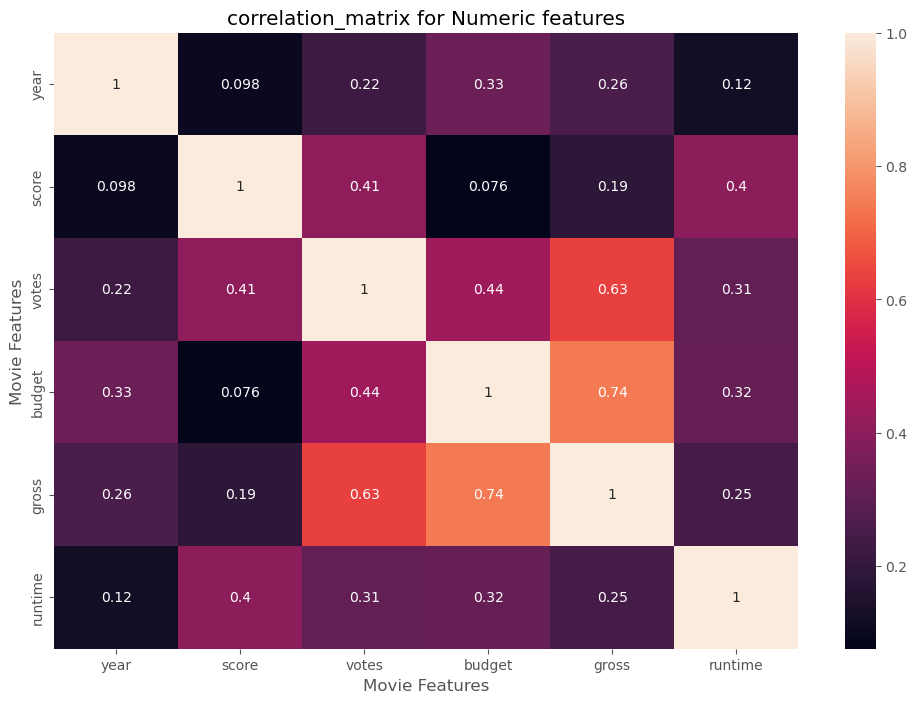

In [46]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation_matrix for Numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()


In [47]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,Apri


In [61]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized.head()
        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8


In [62]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8


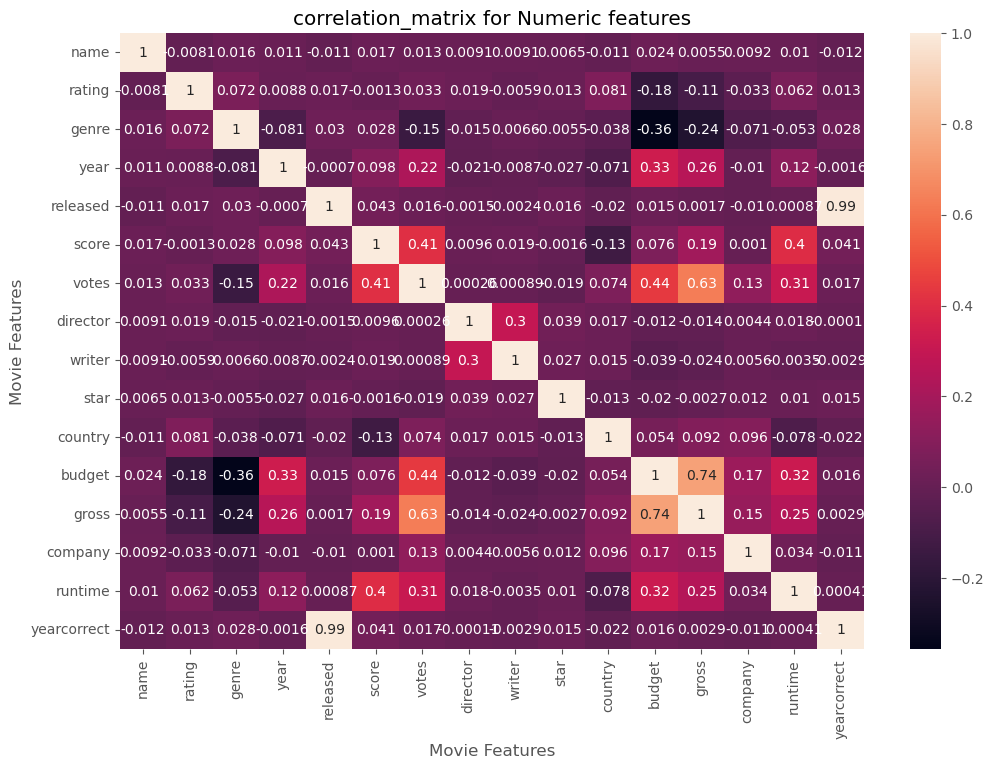

In [56]:
correlation_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('correlation_matrix for Numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [63]:
df_numerized.corr().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,-0.011725
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.013475
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,0.028397
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,-0.001562
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,0.993694


In [58]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs


name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.023970
             gross          0.005533
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [59]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs 

genre        budget        -0.356564
budget       genre         -0.356564
genre        gross         -0.235650
gross        genre         -0.235650
budget       rating        -0.176002
rating       budget        -0.176002
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
rating       gross         -0.107339
gross        rating        -0.107339
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
budget       writer        -0.039451
writer       budget        -0.039451
country      genre         -0.037615
genre        country       -0.037615
company      rating        -0.032943
r

In [60]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.630757
gross        votes          0.630757
             budget         0.740395
budget       gross          0.740395
yearcorrect  released       0.993694
released     yearcorrect    0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and gross have the highest correlation to gross earning

#Company has low correlation
#I was wrong